<a href="https://colab.research.google.com/github/kmadden9/realTimeML/blob/main/ECGR5106_HW0_Q3_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Kevin Madden 
#Date Started: 1/25/2022
#Due Date: 1/26/2022
#Professor: Dr. Hamed Tabkhi, PH.D.

import torch

In [2]:
#checking if I have GPU connected
torch.cuda.is_available()

True

In [3]:
#Collecting already trained models
from torchvision import models

In [4]:
dir(models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [5]:
#downloading the pre-trained models
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
#establishes 'preprocess' as a transform
from torchvision import transforms
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])

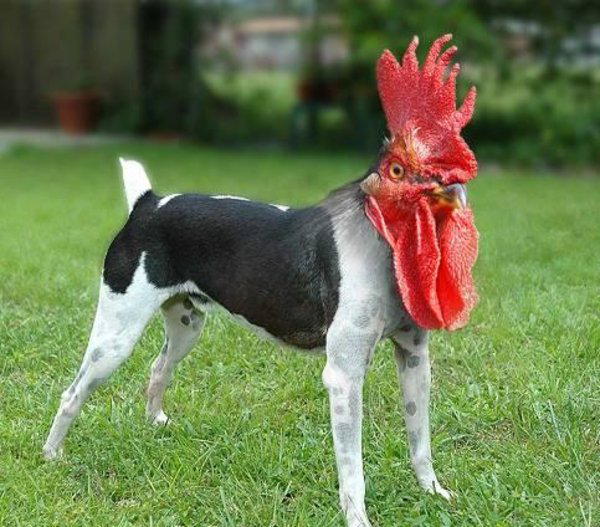

In [8]:
#Using Pillow to import images into python
#not sure why, but I had to import BytesIO for this to work
from PIL import Image
import requests
from io import BytesIO

#pic 1 url = 'https://raw.githubusercontent.com/kmadden9/realTimeML/828fe0094c48b244f967e8c31058bcbad0ec3ba9/HW/HW-0/skateboard.jpg'
#pic 2 url = 'https://raw.githubusercontent.com/kmadden9/realTimeML/b86e22f789fccb131c908aa053cbc1b7b1899ffa/HW/HW-0/frog.jpg'
#pic 3 url = 'https://raw.githubusercontent.com/kmadden9/realTimeML/828fe0094c48b244f967e8c31058bcbad0ec3ba9/HW/HW-0/livingRoom.jpg'
#pic 4 url = 'https://raw.githubusercontent.com/kmadden9/realTimeML/828fe0094c48b244f967e8c31058bcbad0ec3ba9/HW/HW-0/pho.jpg'
url = 'https://raw.githubusercontent.com/kmadden9/realTimeML/828fe0094c48b244f967e8c31058bcbad0ec3ba9/HW/HW-0/dogChicken.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))


img

In [9]:
#Make it so that the image fits into our model
img_t = preprocess(img)

In [10]:
batch_t = torch.unsqueeze(img_t, 0)

In [11]:
#Run the model
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
out = resnet(batch_t)

In [13]:
#displays out scores of the 1000 labels
out

tensor([[-9.4336e-01,  4.8622e-01, -3.3234e+00, -1.7260e+00, -2.4838e+00,
         -1.1646e+00, -3.7422e+00,  7.9198e+00,  6.5522e+00,  1.2693e+00,
         -6.7527e-01,  1.1508e+00,  8.1701e-01, -2.3118e+00, -2.0727e+00,
          2.8318e-01,  1.3017e-01, -5.5378e-01,  1.2739e+00, -1.3971e+00,
         -2.3844e+00,  1.5911e-01, -3.4946e+00,  6.4223e-01, -2.1785e+00,
         -1.0453e+00,  7.1786e-01, -6.2340e-01, -1.4381e+00,  3.2988e+00,
          1.7954e-01,  8.3274e-01,  2.7009e+00, -2.8900e+00, -2.7622e+00,
          2.9975e-01,  1.0293e+00, -4.5238e-02,  1.4141e+00, -2.7617e-01,
          3.0898e-01,  1.5744e+00,  2.0504e+00,  1.1744e+00,  2.4375e-01,
         -1.6883e+00, -4.0701e-01, -3.4582e-01, -2.4815e+00, -2.5411e+00,
         -2.4029e+00,  5.0219e-01,  8.8961e-01, -6.9043e-01, -6.3178e-01,
         -2.5100e+00,  3.4753e-01, -1.3308e+00, -1.4832e+00, -2.9244e-01,
         -1.4566e-01, -1.3647e+00, -7.0761e-03,  1.6651e+00, -1.6026e+00,
         -8.9536e-01,  4.1672e-02, -2.

In [15]:
#loading the 1000 labels, which are uploaded to the drive in this case
with open('/content/imagenet_classes.txt') as f:
  labels = [line.strip() for line in f.readlines()]

In [16]:
_, index = torch.max(out, 1)

In [17]:
#using the index to find the highest scoring label
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

("158: 'toy terrier',", 20.60536766052246)

In [18]:
#sorting the list by score and listing the top 5 scoring labels
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[("158: 'toy terrier',", 20.60536766052246),
 ("7: 'cock',", 19.47269058227539),
 ("166: 'Walker hound, Walker foxhound',", 6.645666599273682),
 ("188: 'wire-haired fox terrier',", 6.265324592590332),
 ("8: 'hen',", 4.96008825302124)]

In [24]:
!pip install ptflops
!pip install --upgrade git+https://github.com/sovrasov/flops-counter.pytorch.git

  Created wheel for ptflops: filename=ptflops-0.6.8-py3-none-any.whl size=11871 sha256=579ef05745f803222ddc185140c36122bbd9b95855b0476751e13c20cd53c3f3
  Stored in directory: /root/.cache/pip/wheels/7c/ae/5f/74bef440471072ff2e39101cc9565460bfc17804f072bd7cff
Successfully built ptflops
  Cloning https://github.com/sovrasov/flops-counter.pytorch.git to /tmp/pip-req-build-6gde5qjf
  Running command git clone -q https://github.com/sovrasov/flops-counter.pytorch.git /tmp/pip-req-build-6gde5qjf


In [27]:
import torchvision.models as models
import torch

from ptflops import get_model_complexity_info

with torch.cuda.device(0):
  net = models.resnet101()
  macs, params = get_model_complexity_info(net, (3, 224, 224), as_strings=True,
                                           print_per_layer_stat=True, verbose=True)
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))

ResNet(
  44.549 M, 100.000% Params, 7.85 GMac, 100.000% MACs, 
  (conv1): Conv2d(0.009 M, 0.021% Params, 0.118 GMac, 1.503% MACs, 3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(0.0 M, 0.000% Params, 0.002 GMac, 0.020% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(0.0 M, 0.000% Params, 0.001 GMac, 0.010% MACs, inplace=True)
  (maxpool): MaxPool2d(0.0 M, 0.000% Params, 0.001 GMac, 0.010% MACs, kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    0.216 M, 0.484% Params, 0.68 GMac, 8.668% MACs, 
    (0): Bottleneck(
      0.075 M, 0.168% Params, 0.236 GMac, 3.012% MACs, 
      (conv1): Conv2d(0.004 M, 0.009% Params, 0.013 GMac, 0.164% MACs, 64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(0.0 M, 0.000% Params, 0.0 GMac, 0.005% MACs, 64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(0.037 M, 0.0